### **Week 2 MLT**

In [2]:
import numpy as np

In [3]:
!pip install IPython

## **Training** Data

In [4]:
w1 = 3
w0 = 4
n = 100

X = 10 * np.random.rand(n,)

y = w0+w1*X+np.random.rand(n,)

In [5]:
print(X.shape,y.shape)

(100,) (100,)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [7]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(80,) (80,) (20,) (20,)


In [8]:
X_train[:5]

array([7.3053553 , 5.03454216, 0.96268219, 5.80857767, 6.02257522])

In [9]:
y_train[:5]

array([26.74629179, 19.91124018,  7.60288258, 21.73362504, 22.10508863])

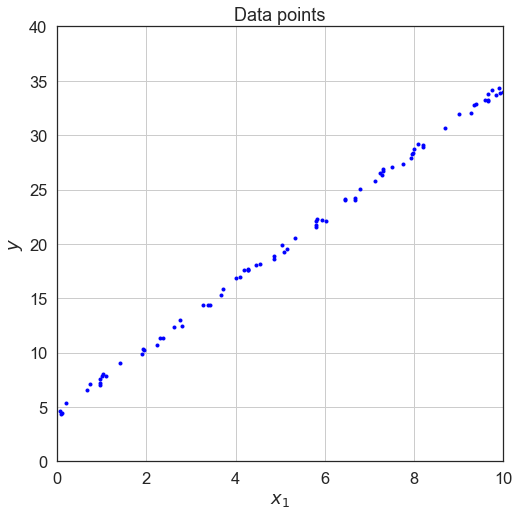

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("white")
f = plt.figure(figsize = (8,8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2.5})

plt.plot(X_train,y_train,"b.")
plt.title("Data points")
plt.grid(True)
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", fontsize = 18)
plt.axis([0,10,0,40])

plt.show()



In [11]:
def add_dummy(x):
  return np.column_stack((np.ones(x.shape[0]),x))  #input - tuple

In [12]:
np.column_stack?

Signature: np.column_stack(tup)
Docstring:
Stack 1-D arrays as columns into a 2-D array.

Take a sequence of 1-D arrays and stack them as columns
to make a single 2-D array. 2-D arrays are stacked as-is,
just like with `hstack`.  1-D arrays are turned into 2-D columns
first.

Parameters
----------
tup : sequence of 1-D or 2-D arrays.
    Arrays to stack. All of them must have the same first dimension.

Returns
-------
stacked : 2-D array
    The array formed by stacking the given arrays.

See Also
--------
stack, hstack, vstack, concatenate

Examples
--------
>>> a = np.array((1,2,3))
>>> b = np.array((2,3,4))
>>> np.column_stack((a,b))
array([[1, 2],
       [2, 3],
       [3, 4]])
File:      c:\users\kisse\anaconda3\lib\site-packages\numpy\lib\shape_base.py
Type:      function


Testing

In [13]:
import unittest

class TestDummy(unittest.TestCase):
  def test_dummy(self):
    train_matrix = np.array([[3,2,5],[9,4,7]])
    train_matrix_with_dummy = add_dummy(train_matrix)

    self.assertEqual(train_matrix_with_dummy.shape,(2,4))

    np.testing.assert_array_equal(train_matrix_with_dummy,np.array([[1,3,2,5],[1,9,4,7]]))

unittest.main(argv=[''], defaultTest = 'TestDummy', verbosity  = 2, exit = False)




test_dummy (__main__.TestDummy) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [14]:
add_dummy(np.array([[3,4],[9,7]]))

array([[1., 3., 4.],
       [1., 9., 7.]])

In [15]:
print("Before adding dummy",X_train[:5])
print("After adding dummy")

X_train_with_dummy = add_dummy(X_train)
print(X_train_with_dummy[:5])

Before adding dummy [7.3053553  5.03454216 0.96268219 5.80857767 6.02257522]
After adding dummy
[[1.         7.3053553 ]
 [1.         5.03454216]
 [1.         0.96268219]
 [1.         5.80857767]
 [1.         6.02257522]]


### **Model**

In [16]:
def predict(X,w):

  assert X.shape[-1]==w.shape[0]
  return X@w

In [17]:
import unittest
class TestPredict(unittest.TestCase):

  def test_predict(self):

    train_matrix_0 = np.array([[3,2,5],[9,4,7]])
    train_matrix = add_dummy(train_matrix_0)
    weight_vector = np.array([1,1,1,1])
    expected_label_vector = np.array([11,21])

    predicted_label_vec = predict(train_matrix,weight_vector)

    self.assertEqual(predicted_label_vec.shape, (2,))

    np.testing.assert_array_equal(predicted_label_vec, expected_label_vector)

unittest.main(argv = [''], defaultTest = "TestPredict", verbosity = 2, exit = False)

test_predict (__main__.TestPredict) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [18]:
def generate_data(n):
  w1 = 3
  w0 = 4

  X = 10 * np.random.rand(n,)

  y = w0+w1*X+np.random.rand(n,)

  return X,y

In [19]:


w1 = 3
w0 = 4
n = 100

X = 10 * np.random.rand(n,)

y = w0+w1*X+np.random.rand(n,)

In [20]:
X_dummy = add_dummy(X)

In [21]:
def preprocess(X,y):
  X_dummy = add_dummy(X)
  return  train_test_split(X_dummy,y,test_size = 0.2, random_state = 42)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dummy,y,test_size = 0.2, random_state = 42)

In [23]:
w = np.random.rand(2,)
w

array([0.80329201, 0.25518037])

In [24]:
y_hat = predict(X_train, w)

In [25]:
y_hat[:10]

array([2.89309847, 2.8867704 , 3.13759676, 1.04092322, 3.18170941,
       1.89426632, 3.23560613, 1.39891888, 2.56580477, 2.95305611])

In [26]:
y[:10]

array([ 6.51056951, 22.79191416, 22.98030629, 34.5923492 , 33.63355702,
       24.72994105, 10.82666638,  8.48312179,  8.65783039, 25.33625981])

Non-vectorized

In [27]:
def non_vec(X,w):

  y = []
  for i in range(0,X.shape[0]):
    y_hat_i = 0
    for j in range(0,X.shape[-1]):
      y_hat_i += X[i][j]*w[j]
    y.append(y_hat_i)
  return np.array(y)

In [28]:
import unittest

class TestPredictNonvec(unittest.TestCase):

  def test_predict_nonvec(self):
    train_matrix_0 = np.array([[3,2,5],[9,4,7]])
    train_matrix = add_dummy(train_matrix_0)
    weight_vector = np.array([1,1,1,1])
    expected_label_vector = np.array([11,21])

    predicted_label_vec = non_vec(train_matrix,weight_vector)

    self.assertEqual(predicted_label_vec.shape, (2,))

    np.testing.assert_array_equal(predicted_label_vec, expected_label_vector)

unittest.main(argv = [''], defaultTest = "TestPredict", verbosity = 2, exit = False)


test_predict (__main__.TestPredict) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


Vectorized vs Nonvectorized

In [29]:
import time 

start_time = time.time()
y_hat_vecorized = predict(X_train, w)
end_time = time.time()
print("Vector time: ", end_time - start_time)

start_time = time.time()
y_hat_vecorized = non_vec(X_train, w)
end_time = time.time()
print("Non-Vector time: ", end_time - start_time)

Vector time:  0.0
Non-Vector time:  0.0004961490631103516


In [30]:
X,y = generate_data(n = 1000000)
X_dummy = add_dummy(X)
X_train, X_test, y_train, y_test = train_test_split(X_dummy,y,test_size = 0.2, random_state = 42)

start_time = time.time()
y_hat_vecorized = predict(X_train, w)
end_time = time.time()
print("Vector time: ", end_time - start_time)

start_time = time.time()
y_hat_vecorized = non_vec(X_train, w)
end_time = time.time()
print("Non-Vector time: ", end_time - start_time)

Vector time:  0.002443075180053711
Non-Vector time:  1.3372526168823242


## **Loss Function**

In [31]:
def loss (X,y,w):
  e = predict(X,w) - y
  # print(e)
  return 0.5*(np.transpose(e)@e)

In [32]:
import unittest

class TestLoss(unittest.TestCase):

  def test_predict_nonvec(self):
    train_matrix_0 = np.array([[3,2,5],[9,4,7]])
    train_matrix = add_dummy(train_matrix_0)
    weight_vector = np.array([1,1,1,1])
    label_vector = np.array([6,11])
    expected_loss = np.array([62.5])

    loss_val = loss(train_matrix, label_vector, weight_vector)
    print(loss_val)

    self.assertEqual(loss_val.shape, ())

    np.testing.assert_array_equal(loss_val, expected_loss)

unittest.main(argv = [''], defaultTest = "TestLoss", verbosity = 2, exit = False)


test_predict_nonvec (__main__.TestLoss) ... 

62.5


ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [33]:
X,y = generate_data(100)
X_train, X_test, y_train, y_test = preprocess(X,y)
w = np.random.rand(2,)

In [34]:
def visualize_loss_single_feature(X_train, y_train, w):
  sns.set_style("white")
  f = plt.figure(figsize = (8,8))
  sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2.5})

  print(X_train.shape, y_train[:5])
  plt.plot(X_train[:,-1],y_train,"b.")
  pred = predict(X_train,w)
  plt.plot(X_train[:,-1], pred ,"b.", color = 'green')
  plt.title("Loss-vis")
  plt.grid(True)
  plt.xlabel("$x_1$", fontsize = 18)
  plt.ylabel("$y$", fontsize = 18)
  plt.axis([0,10,0,40])

  plt.vlines(X_train[:,-1], pred, y_train, colors = 'r', linestyles = 'solid')

  plt.show()


(80, 2) [29.29312937 26.70141029 14.55502631 17.74854409 29.92926205]


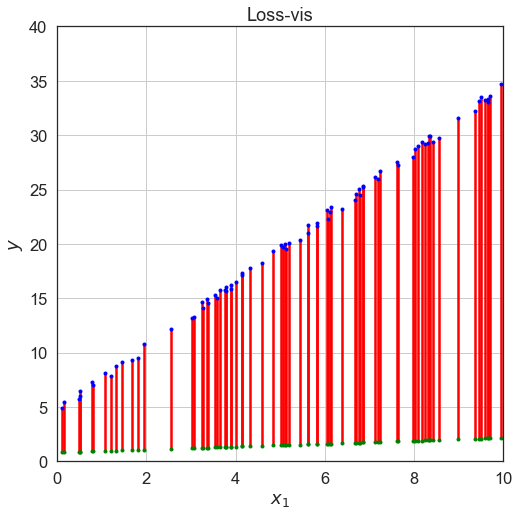

In [35]:
visualize_loss_single_feature(X_train,y_train,w)

(80, 2) [29.29312937 26.70141029 14.55502631 17.74854409 29.92926205]


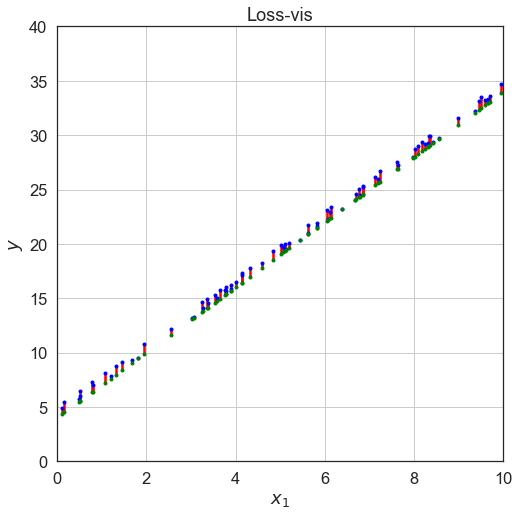

In [36]:
visualize_loss_single_feature(X_train,y_train,np.array([4,3]))

## **Optimization**

In [37]:
X,y = generate_data(100)
X_train, X_test, y_train, y_test = preprocess(X,y)

Normal equation

In [38]:
def normal_eq(X,y):
  # returns weight vec
  return np.linalg.pinv(X)@y     #pseudoiverse of X

In [39]:
import unittest

class TestNormal(unittest.TestCase):

  def test_predict_nonvec(self):
    train_matrix = X_train
    label_vector = y_train
    expected_weight_vector = np.array([4.,3.])

    estimated_weight_vec = normal_eq(train_matrix, label_vector)
    print(estimated_weight_vec)
    
    self.assertEqual(estimated_weight_vec.shape, (2,))

    np.testing.assert_array_almost_equal(
        estimated_weight_vec, expected_weight_vector, decimal = 0)

unittest.main(argv = [''], defaultTest = "TestNormal", verbosity = 2, exit = False)


test_predict_nonvec (__main__.TestNormal) ... 

[4.45230311 3.01576449]


ok

----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


Gradient Descent

In [40]:
def calc_grad(X,y,w):
  return np.transpose(X)@(predict(X,w)-y)
  


In [41]:
class TestGrad(unittest.TestCase):

  def test_grad(self):
    train_matrix_0 = np.array([[3,2,5],[9,4,7]])
    train_matrix = add_dummy(train_matrix_0)
    weight_vector = np.array([1,1,1,1])
    label_vector = np.array([6,11])
    expected_grad = np.array([15, 105, 50, 95])

    grad = calc_grad(train_matrix, label_vector, weight_vector)
    # print(loss_val)

    self.assertEqual(grad.shape, (4,))

    np.testing.assert_array_equal(grad, expected_grad)

unittest.main(argv = [''], defaultTest = "TestGrad", verbosity = 2, exit = False)


test_grad (__main__.TestGrad) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


Weight Update

In [42]:
def weightupdate(w, grad, lr):
  return (w - lr*grad)

In [43]:
class TestWeight(unittest.TestCase):

  def test_weight(self):
    # train_matrix_0 = np.array([[3,2,5],[9,4,7]])
    # train_matrix = add_dummy(train_matrix_0)
    weight_vector = np.array([1,1,1,1])
    # label_vector = np.array([6,11])
    grad_vec = np.array([15, 105, 50, 95])
    expected_w = np.array([0.985, 0.895, 0.95, 0.905])

    w_new = weightupdate(weight_vector, grad_vec, 0.001)
    # print(loss_val)

    self.assertEqual(w_new.shape, (4,))

    np.testing.assert_array_equal(w_new, expected_w)

unittest.main(argv = [''], defaultTest = "TestWeight", verbosity = 2, exit = False)


test_weight (__main__.TestWeight) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [44]:
def gradient_descent(X:np.ndarray,y:np.ndarray, lr:float, num_epochs:int):
  w_all = []
  err_all = []

  w = np.zeros((X.shape[1]))

  print()

  for i in np.arange(0,num_epochs):
    w_all.append(w)

    err_all.append(loss(X,y,w))

    djdw = calc_grad(X,y,w)

    if i%100 == 0:
      print("Iteration: %d, loss: %4.2f" %(i, err_all[-1]))

    w = weightupdate(w,djdw,lr)

  return w, err_all, w_all



In [45]:
class TestGD(unittest.TestCase):

  def test_gd(self):
    train_matrix = X_train
    label_vector = y_train
    expected_weight_vector = np.array([4.,3.])

    w,err_all, w_all = gradient_descent(train_matrix, label_vector, lr = 0.0001, num_epochs = 2000)
    # print(estimated_weight_vec)
    
    self.assertEqual(w.shape, (2,))

    np.testing.assert_array_almost_equal(
        w, expected_weight_vector, decimal = 0)

unittest.main(argv = [''], defaultTest = "TestGD", verbosity = 2, exit = False)


test_gd (__main__.TestGD) ... 


Iteration: 0, loss: 18530.73
Iteration: 100, loss: 114.18
Iteration: 200, loss: 74.95
Iteration: 300, loss: 49.59
Iteration: 400, loss: 33.21
Iteration: 500, loss: 22.62
Iteration: 600, loss: 15.78
Iteration: 700, loss: 11.35
Iteration: 800, loss: 8.49
Iteration: 900, loss: 6.65
Iteration: 1000, loss: 5.45
Iteration: 1100, loss: 4.68
Iteration: 1200, loss: 4.18
Iteration: 1300, loss: 3.86
Iteration: 1400, loss: 3.65
Iteration: 1500, loss: 3.52
Iteration: 1600, loss: 3.43
Iteration: 1700, loss: 3.37
Iteration: 1800, loss: 3.34
Iteration: 1900, loss: 3.31


ok

----------------------------------------------------------------------
Ran 1 test in 0.043s

OK


In [46]:
w, err_all, w_all = gradient_descent(X_train, y_train, lr = 0.00001, num_epochs = 200)


Iteration: 0, loss: 18530.73
Iteration: 100, loss: 232.01


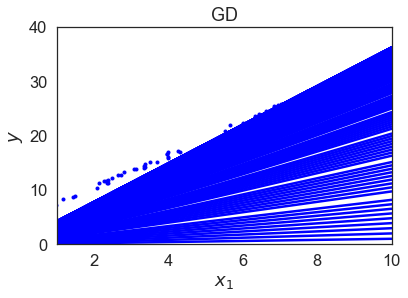

In [47]:
X_b = np.c_[np.ones((X.shape[0], 1)), X]   #add_dummy
X_new = np.array([[0], [10]])
X_new_b = np.c_[np.ones((2,1)), X_new]     #add_dummy

for j in range(0, len(w_all)):
  if j%10==0: continue
  y_hat = predict(X_new_b, w_all[j])
  style = 'b-' if j>0 else "r--"
  plt.plot(X_new_b[:,1], y_hat, style)

plt.plot(X_train[:,1], y_train, "b.")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", fontsize = 18)
plt.title("GD", fontsize = 18)
plt.axis([1,10,0,40])
plt.show()

In [48]:
 X_new_b

array([[ 1.,  0.],
       [ 1., 10.]])

In [49]:
def plot_learning_curve(err_all):
    plt.plot(err_all)
    plt.xlabel("iter#")
    plt.ylabel("loss")


Iteration: 0, loss: 18530.73
Iteration: 100, loss: 114.18
Iteration: 200, loss: 74.95
Iteration: 300, loss: 49.59
Iteration: 400, loss: 33.21
Iteration: 500, loss: 22.62
Iteration: 600, loss: 15.78
Iteration: 700, loss: 11.35
Iteration: 800, loss: 8.49
Iteration: 900, loss: 6.65
Iteration: 1000, loss: 5.45
Iteration: 1100, loss: 4.68
Iteration: 1200, loss: 4.18
Iteration: 1300, loss: 3.86
Iteration: 1400, loss: 3.65
Iteration: 1500, loss: 3.52
Iteration: 1600, loss: 3.43
Iteration: 1700, loss: 3.37
Iteration: 1800, loss: 3.34
Iteration: 1900, loss: 3.31


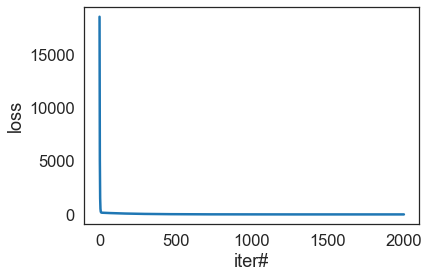

In [50]:
w,err_all,w_all = gradient_descent(X_train, y_train, lr = 0.0001, num_epochs = 2000)
plot_learning_curve(err_all)

Learning rate and convergence


Iteration: 0, loss: 18530.73
Iteration: 100, loss: 10679.76
Iteration: 200, loss: 6186.09
Iteration: 300, loss: 3613.90
Iteration: 400, loss: 2141.45
Iteration: 500, loss: 1298.40
Iteration: 600, loss: 815.59
Iteration: 700, loss: 538.96
Iteration: 800, loss: 380.32
Iteration: 900, loss: 289.22
Iteration: 1000, loss: 236.78
Iteration: 1100, loss: 206.46
Iteration: 1200, loss: 188.80
Iteration: 1300, loss: 178.40
Iteration: 1400, loss: 172.14
Iteration: 1500, loss: 168.26
Iteration: 1600, loss: 165.74
Iteration: 1700, loss: 164.01
Iteration: 1800, loss: 162.72
Iteration: 1900, loss: 161.69


Text(0.5, 1.0, '1e-6 lr')

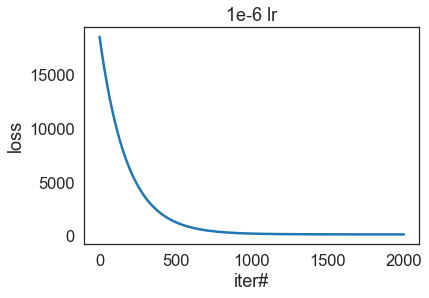

In [51]:
w,err_all,w_all = gradient_descent(X_train, y_train, lr = 1e-6, num_epochs = 2000)
plot_learning_curve(err_all)
plt.title("1e-6 lr")


Iteration: 0, loss: 18530.73
Iteration: 100, loss: 114.18
Iteration: 200, loss: 74.95
Iteration: 300, loss: 49.59
Iteration: 400, loss: 33.21
Iteration: 500, loss: 22.62
Iteration: 600, loss: 15.78
Iteration: 700, loss: 11.35
Iteration: 800, loss: 8.49
Iteration: 900, loss: 6.65
Iteration: 1000, loss: 5.45
Iteration: 1100, loss: 4.68
Iteration: 1200, loss: 4.18
Iteration: 1300, loss: 3.86
Iteration: 1400, loss: 3.65
Iteration: 1500, loss: 3.52
Iteration: 1600, loss: 3.43
Iteration: 1700, loss: 3.37
Iteration: 1800, loss: 3.34
Iteration: 1900, loss: 3.31


Text(0.5, 1.0, '1e-4 lr')

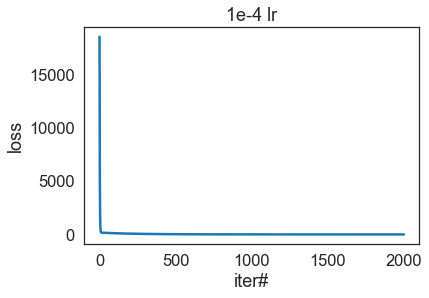

In [52]:
w,err_all,w_all = gradient_descent(X_train, y_train, lr = 1e-4, num_epochs = 2000)
plot_learning_curve(err_all)
plt.title("1e-4 lr")


Iteration: 0, loss: 18530.73
Iteration: 100, loss:  inf
Iteration: 200, loss:  nan
Iteration: 300, loss:  nan
Iteration: 400, loss:  nan
Iteration: 500, loss:  nan
Iteration: 600, loss:  nan
Iteration: 700, loss:  nan
Iteration: 800, loss:  nan
Iteration: 900, loss:  nan
Iteration: 1000, loss:  nan
Iteration: 1100, loss:  nan
Iteration: 1200, loss:  nan
Iteration: 1300, loss:  nan
Iteration: 1400, loss:  nan
Iteration: 1500, loss:  nan
Iteration: 1600, loss:  nan
Iteration: 1700, loss:  nan
Iteration: 1800, loss:  nan
Iteration: 1900, loss:  nan


<ipython-input-31-04d6d4f60cd0>:4: RuntimeWarning: overflow encountered in matmul
  return 0.5*(np.transpose(e)@e)
<ipython-input-40-ce87ffcaad99>:2: RuntimeWarning: overflow encountered in matmul
  return np.transpose(X)@(predict(X,w)-y)
<ipython-input-40-ce87ffcaad99>:2: RuntimeWarning: invalid value encountered in matmul
  return np.transpose(X)@(predict(X,w)-y)
<ipython-input-42-5b4104d5ce6c>:2: RuntimeWarning: invalid value encountered in subtract
  return (w - lr*grad)


Text(0.5, 1.0, '0.1 lr')

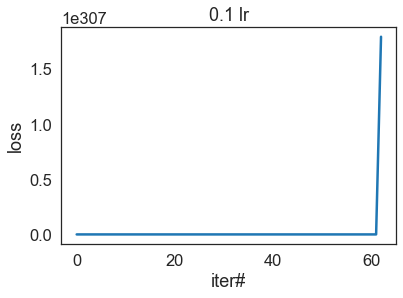

In [53]:
#Divergence
w,err_all,w_all = gradient_descent(X_train, y_train, lr = 0.1, num_epochs = 2000)
plot_learning_curve(err_all)
plt.title("0.1 lr")

## **Optimization and Evaluation**

In [54]:
X,y = generate_data(100)
X_train, X_test, y_train, y_test = preprocess(X,y) 

MGDB

In [55]:
t0, t1 = 200, 100000
def learning_schedule(t):
    return t0/(t+t1)

In [56]:
def mini_batch_gd(X:np.ndarray, y:np.ndarray, num_inter:int, minibatch_size:int):
    w_all = []
    err_all = []

    w = np.zeros(X.shape[1])   #num of feataures
    t = 0

    for epoch in range(num_inter):
        shuffled_indices = np.random.permutation(X.shape[0])
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0,X.shape[0], minibatch_size):
            t+=1
            x1 = X_shuffled[i:i+minibatch_size]
            y1 = y_shuffled[i:i+minibatch_size]
            err_all.append(loss(x1,y1,w))

            gradients = 2/minibatch_size * calc_grad(x1,y1,w)   #why?
            lr = learning_schedule(t)
            
            w = weightupdate(w, gradients, lr)
            w_all.append(w)

    return w, err_all, w_all


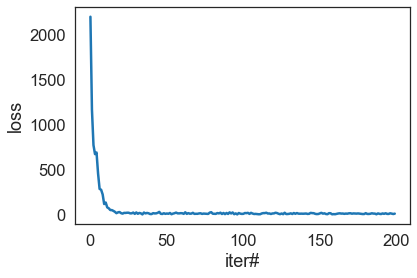

In [57]:
w, err_all, w_all = mini_batch_gd(X_train, y_train, 20, 8)
plot_learning_curve(err_all)


SGD

In [58]:
def sgd(X:np.ndarray, y:np.ndarray, num_epochs:int):
    w_all = []
    err_all = []

    w = np.zeros(X.shape[1])   #num of feataures
    # t = 0

    for epoch in range(num_epochs):
        for i in range((X.shape[1])):
            random_index = np.random.randint(X.shape[0])
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            err_all.append(loss(xi,yi,w))
            gradients = calc_grad(xi,yi,w) 
            lr = learning_schedule(epoch * X.shape[0] + i)

            w = weightupdate(w, gradients, lr)
            w_all.append(w)

    return w, err_all, w_all

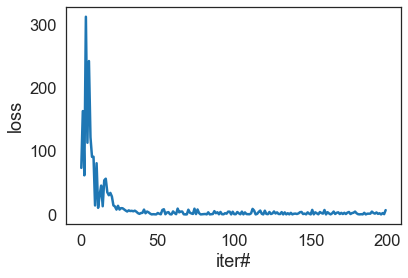

In [59]:
w, err_all, w_all = sgd(X_train, y_train, 100)
plot_learning_curve(err_all)